In [1]:
import pandas as pd
import numpy as np

In [6]:
import pandas as pd
df=pd.read_excel('BlinkIT Grocery Data.xlsx')

In [7]:
df.head(2)

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.1,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.8,115.3492,5.0


Tier 1 → Metro city

Tier 2 → Medium city

Tier 3 → Small city

In [10]:
df[['Outlet Establishment Year', 'Outlet Identifier']]


,Outlet Establishment Year,Outlet Identifier
0,2012,OUT049
1,2022,OUT018
2,2016,OUT046
3,2014,OUT013
4,2015,OUT045
...,...,...
8518,2018,OUT027
8519,2018,OUT027
8520,2018,OUT027
8521,2018,OUT027


In [11]:
df.isnull().sum()

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,1463


In [21]:
df.shape

(8523, 12)

In [12]:
df[df['Item Weight'].isnull()]

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
9,Low Fat,FDX25,Canned,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.101562,NaN,181.9292,5.0
10,LF,FDX21,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.084555,NaN,109.8912,5.0
14,Low Fat,FDH19,Meat,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.032928,NaN,173.1738,5.0
18,Low Fat,FDJ56,Fruits and Vegetables,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.182515,NaN,98.7700,5.0
20,Regular,FDZ07,Fruits and Vegetables,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,60.2194,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


# Data Cleaning

<Axes: xlabel='Item Weight', ylabel='Count'>

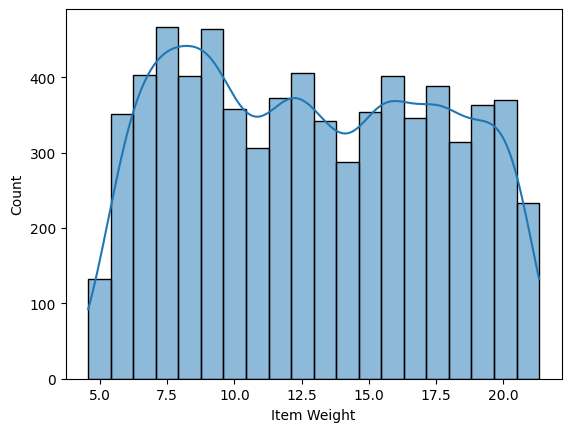

In [13]:
import seaborn as sns

sns.histplot(df['Item Weight'],kde=True)

In [16]:
df['Item Weight']=df['Item Weight'].fillna(df['Item Weight'].mean())

In [17]:
df.isnull().sum()

,0
Item Fat Content,0
Item Identifier,0
Item Type,0
Outlet Establishment Year,0
Outlet Identifier,0
Outlet Location Type,0
Outlet Size,0
Outlet Type,0
Item Visibility,0
Item Weight,0


In [18]:
df.dtypes

,0
Item Fat Content,object
Item Identifier,object
Item Type,object
Outlet Establishment Year,int64
Outlet Identifier,object
Outlet Location Type,object
Outlet Size,object
Outlet Type,object
Item Visibility,float64
Item Weight,float64


In [19]:
df['Item Fat Content'].unique()

array(['Regular', 'Low Fat', 'low fat', 'LF', 'reg'], dtype=object)

In [23]:
df['Item Fat Content']=df['Item Fat Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [25]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

# KPI

In [33]:
#total sales
total_sales=sum(df['Sales'])
print(total_sales)

#average sales
avg_sales=df['Sales'].mean()
print(avg_sales)

#average rating
avg_rating=df['Rating'].mean()
print(avg_rating)

total_items=df['Item Identifier'].count()
print(total_items)

1201681.4928
140.99278338613163
3.965857092573038
8523


# Item Analysis


In [38]:
import matplotlib.pyplot as plt

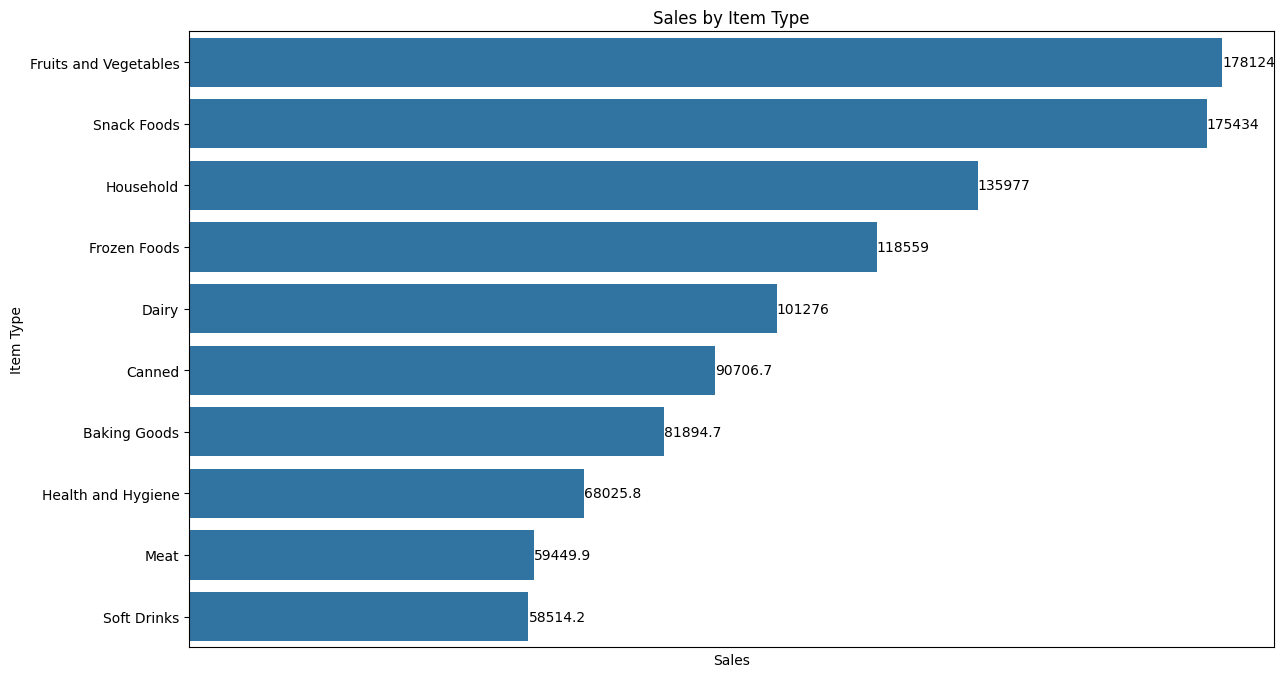

In [69]:
sales_by_item_type=df.groupby('Item Type')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False).head(10)

plt.figure(figsize=(14,8))
ax=sns.barplot(x='Sales',y='Item Type',data=sales_by_item_type,orient='h')
for bars in ax.containers:
  ax.bar_label(bars)

plt.title('Sales by Item Type')
plt.xticks(rotation=90)
plt.grid(axis='x',alpha=0.2)
plt.xticks([])
plt.show()

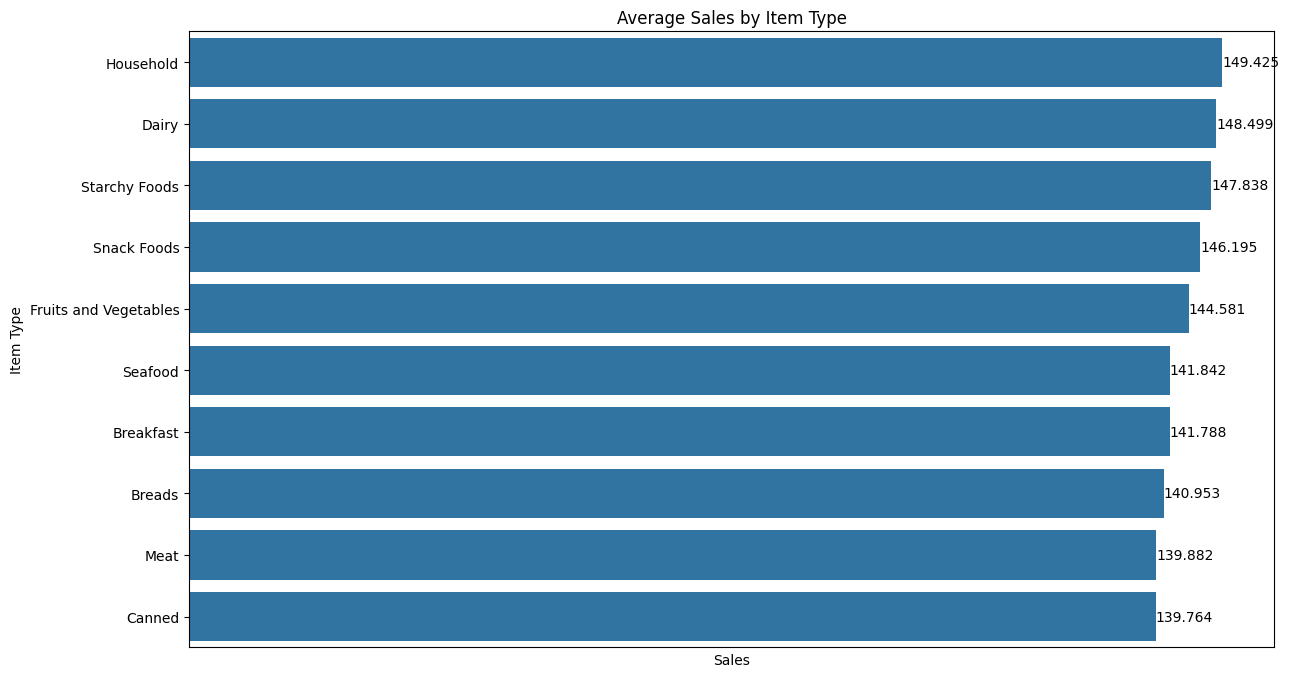

In [187]:
sales_by_item_type=df.groupby('Item Type')['Sales'].mean().reset_index().sort_values(by='Sales',ascending=False).head(10)

plt.figure(figsize=(14,8))
ax=sns.barplot(x='Sales',y='Item Type',data=sales_by_item_type,orient='h')
for bars in ax.containers:
  ax.bar_label(bars)

plt.title('Average Sales by Item Type')
plt.xticks(rotation=90)
plt.grid(axis='x',alpha=0.2)
plt.xticks([])
plt.show()

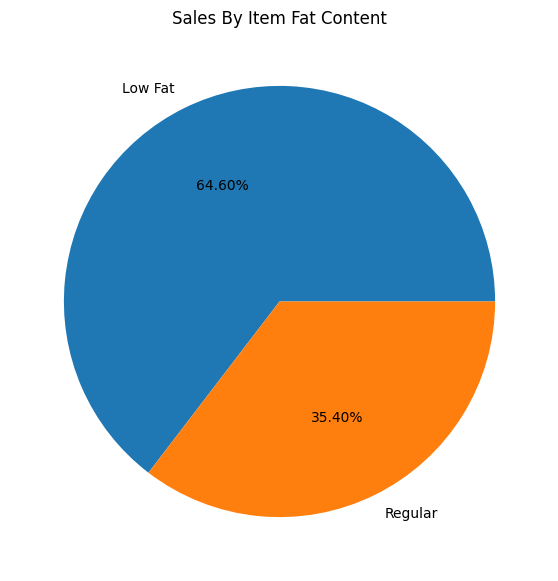

In [188]:

sales_by_fat_content=df.groupby('Item Fat Content')['Sales'].sum().reset_index()
plt.figure(figsize=(7,7))
plt.pie(sales_by_fat_content['Sales'],labels=sales_by_fat_content['Item Fat Content'],autopct='%1.2f%%')
plt.title('Sales By Item Fat Content')
plt.show()

Text(0.5, 1.0, 'Distribution of Item Visibility')

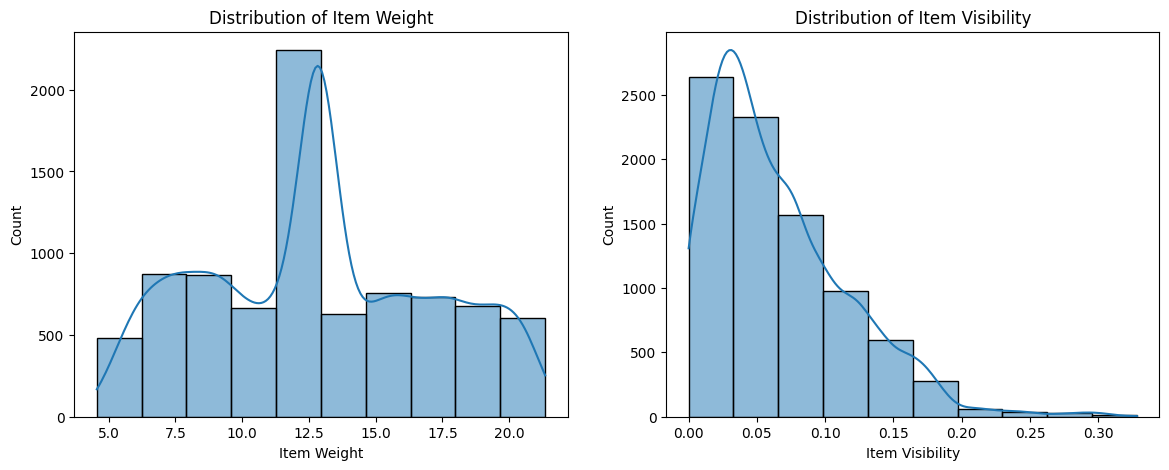

In [110]:
fig,axes=plt.subplots(1,2,figsize=(14,5))

sns.histplot(df['Item Weight'], bins=10, kde=True,ax=axes[0])
axes[0].set_title('Distribution of Item Weight')


# Histogram for Item Visibility
sns.histplot(df['Item Visibility'], bins=10, kde=True,ax=axes[1])
axes[1].set_title('Distribution of Item Visibility')



In [112]:
df[['Item Visibility','Sales']].corr()

,Item Visibility,Sales
Item Visibility,1.000000,-0.001315
Sales,-0.001315,1.000000


# Outlet Analysis

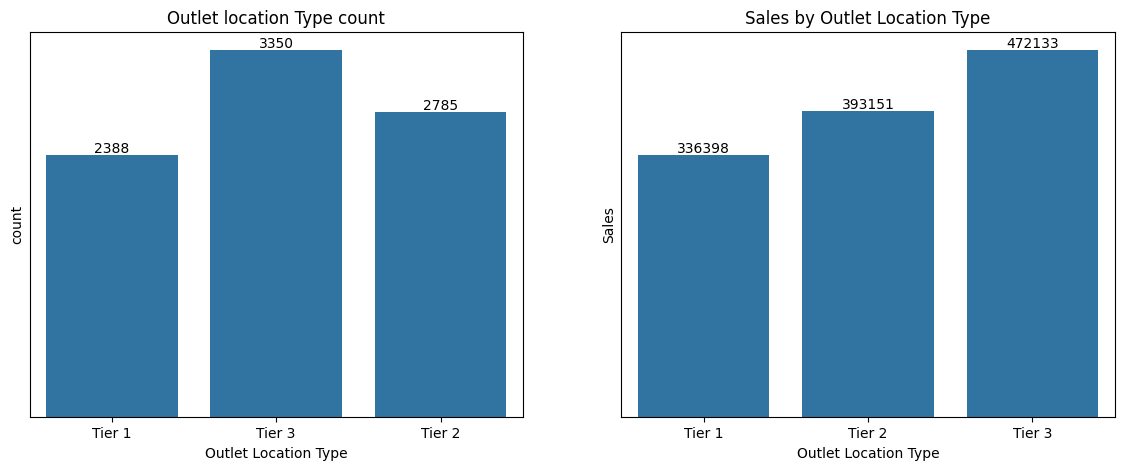

<Figure size 600x500 with 0 Axes>

In [97]:
fig, axes = plt.subplots(1, 2, figsize=(14,5))

outlet_count=sns.countplot(x='Outlet Location Type',data=df,ax=axes[0])
for bars in outlet_count.containers:
  outlet_count.bar_label(bars)

axes[0].set_title('Outlet location Type count')
axes[0].set_yticks([])


sales_by_outlet_loc_type=df.groupby('Outlet Location Type')['Sales'].sum().reset_index()

plt.figure(figsize=(6,5))
ax=sns.barplot(x='Outlet Location Type',y='Sales',data=sales_by_outlet_loc_type,ax=axes[1])
for bars in ax.containers:
  ax.bar_label(bars)

axes[1].set_title('Sales by Outlet Location Type')
axes[1].set_yticks([])

plt.show()

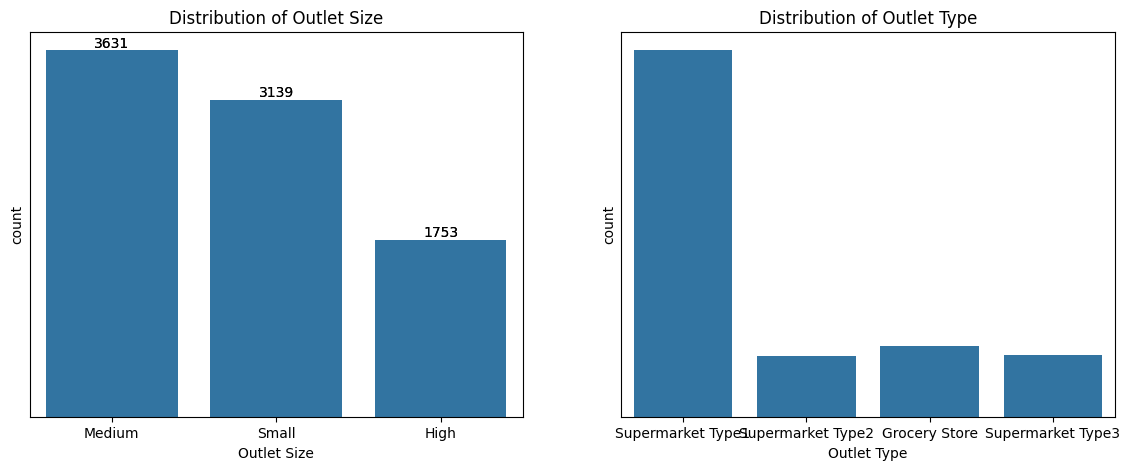

In [121]:
fig,axes=plt.subplots(1,2,figsize=(14,5))

dist_of_outlet_size=sns.countplot(x='Outlet Size',data=df,ax=axes[0])
for bars in dist_of_outlet_size.containers:
  dist_of_outlet_size.bar_label(bars)

axes[0].set_title('Distribution of Outlet Size')
axes[0].set_yticks([])
dist_of_outlet_type=sns.countplot(x='Outlet Type',data=df,ax=axes[1])
for bars in dist_of_outlet_size.containers:
  dist_of_outlet_size.bar_label(bars)

axes[1].set_title('Distribution of Outlet Type')
axes[1].set_yticks([])
plt.show()


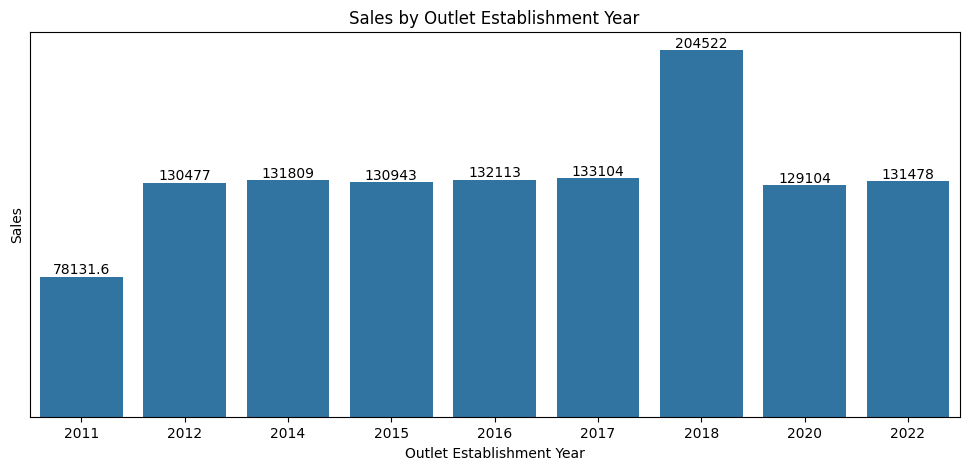

In [103]:
sales_by_outlet_year=df.groupby('Outlet Establishment Year')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)
plt.figure(figsize=(12,5))
ax=sns.barplot(x='Outlet Establishment Year',y='Sales',data=sales_by_outlet_year)

for bars in ax.containers:
  ax.bar_label(bars)

plt.title('Sales by Outlet Establishment Year')
plt.yticks([])
plt.show()

Text(0.5, 1.0, 'Top 5 Outlet Identifier by Sales')

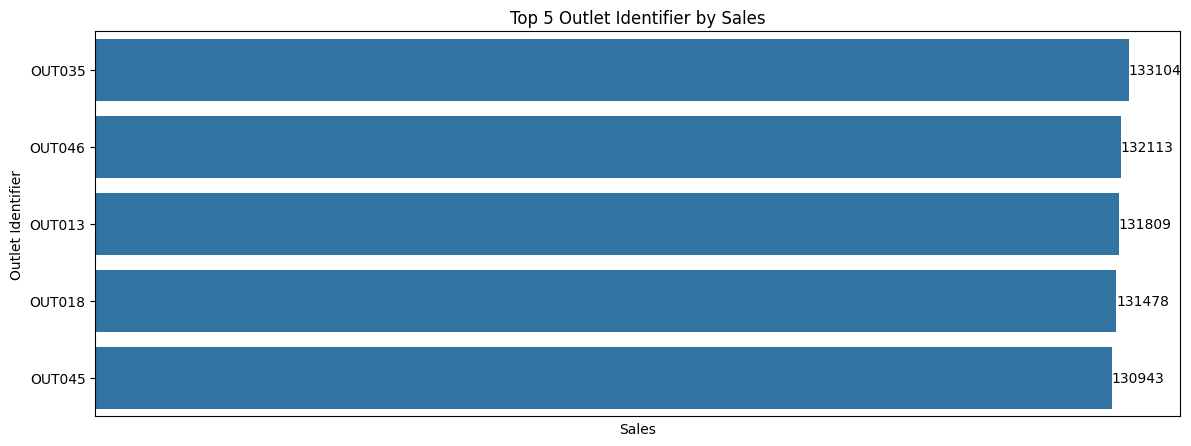

In [127]:
top_5_outlet_id_sales=df.groupby('Outlet Identifier')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False).head(5)

plt.figure(figsize=(14,5))
ax=sns.barplot(x='Sales',y='Outlet Identifier',data=top_5_outlet_id_sales,orient='h')
for bars in ax.containers:
  ax.bar_label(bars)
plt.xticks([])
plt.title('Top 5 Outlet Identifier by Sales')


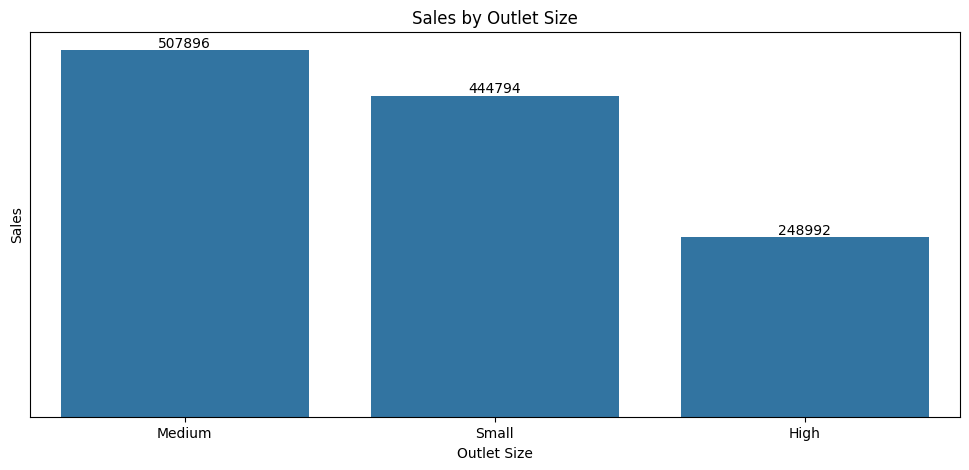

In [107]:
sales_by_outlet_size=df.groupby('Outlet Size')['Sales'].sum().reset_index().sort_values(by='Sales',ascending=False)

plt.figure(figsize=(12,5))
ax=sns.barplot(x='Outlet Size',y='Sales',data=sales_by_outlet_size)

for bars in ax.containers:
  ax.bar_label(bars)

plt.yticks([])
plt.title('Sales by Outlet Size')
plt.show()

# Sales & Rating Analysis

<Axes: xlabel='Sales', ylabel='Count'>

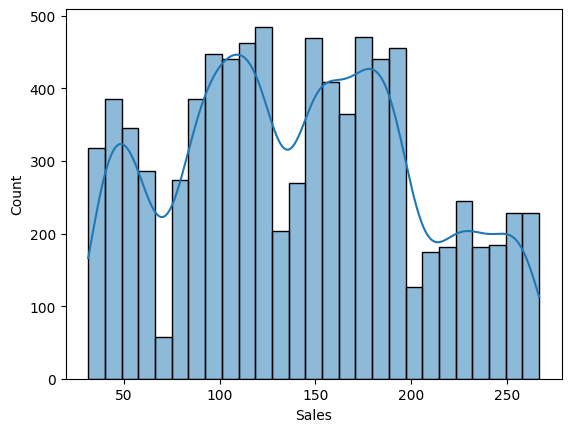

In [128]:
sns.histplot(df['Sales'],kde=True)

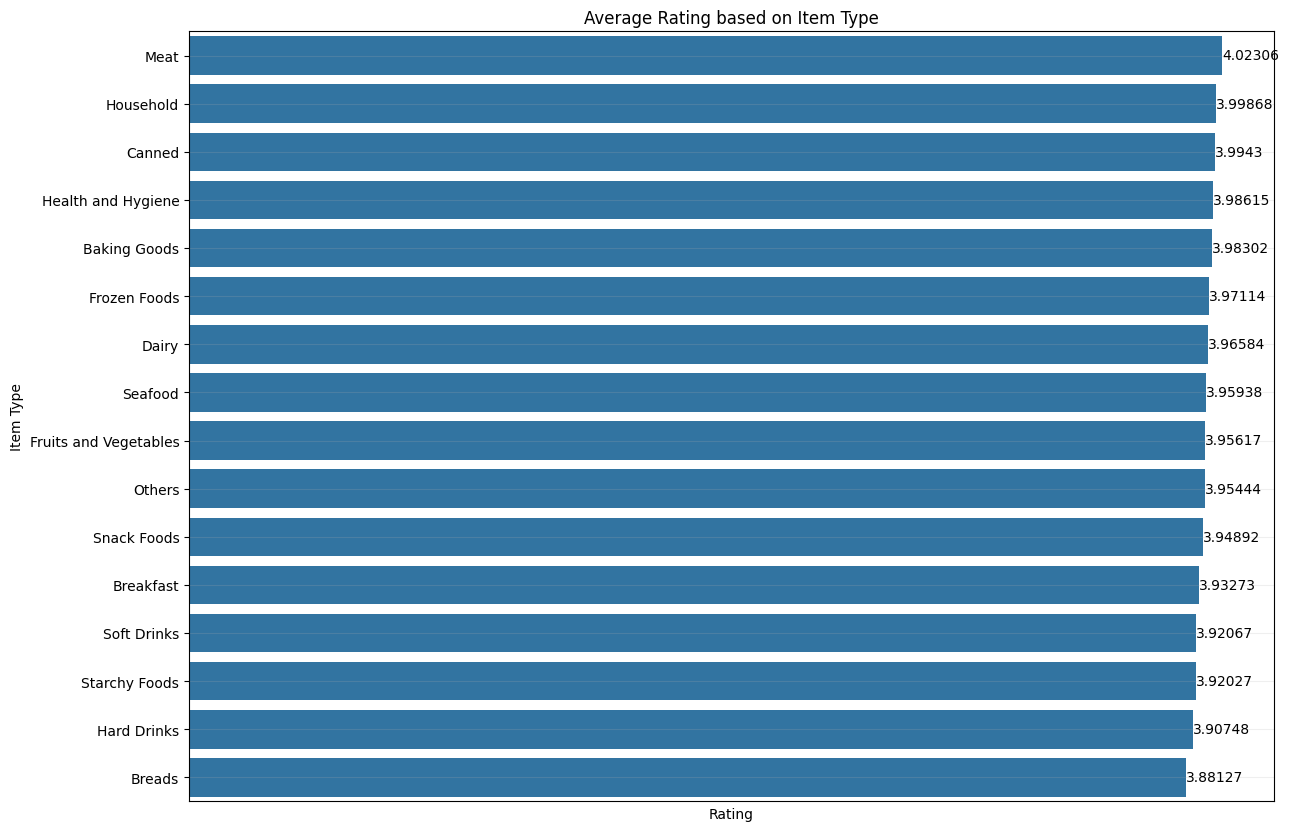

In [149]:
avg_rating_based_on_type=df.groupby('Item Type')['Rating'].mean().reset_index().sort_values(by='Rating',ascending=False)
plt.figure(figsize=(14,10))
ax=sns.barplot(x='Rating',y='Item Type',data=avg_rating_based_on_type)
for bars in ax.containers:
  ax.bar_label(bars)
plt.title("Average Rating based on Item Type")

plt.grid(True,alpha=0.2)
plt.xticks([])
plt.show()


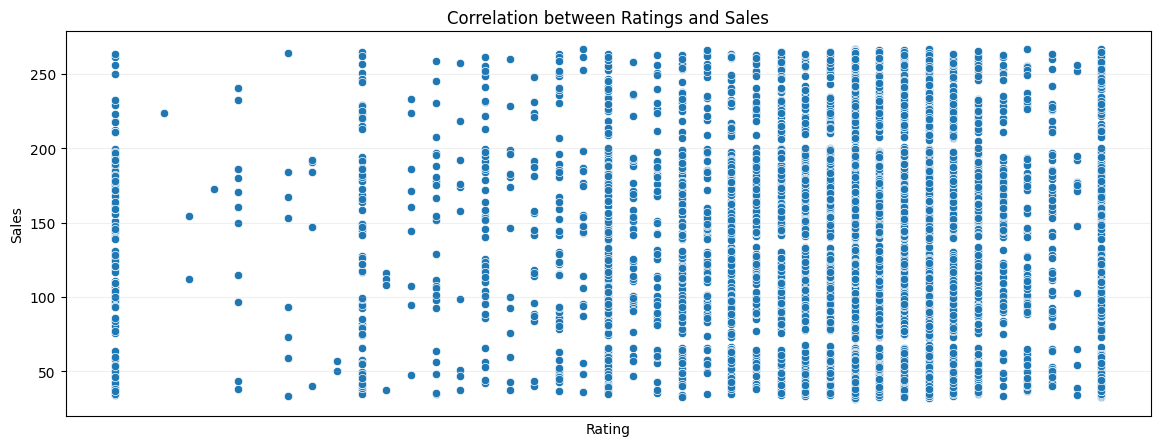

In [152]:
plt.figure(figsize=(14,5))
sns.scatterplot(x='Rating',y='Sales',data=df)

plt.title("Correlation between Ratings and Sales")

plt.grid(True,alpha=0.2)
plt.xticks([])
plt.show()


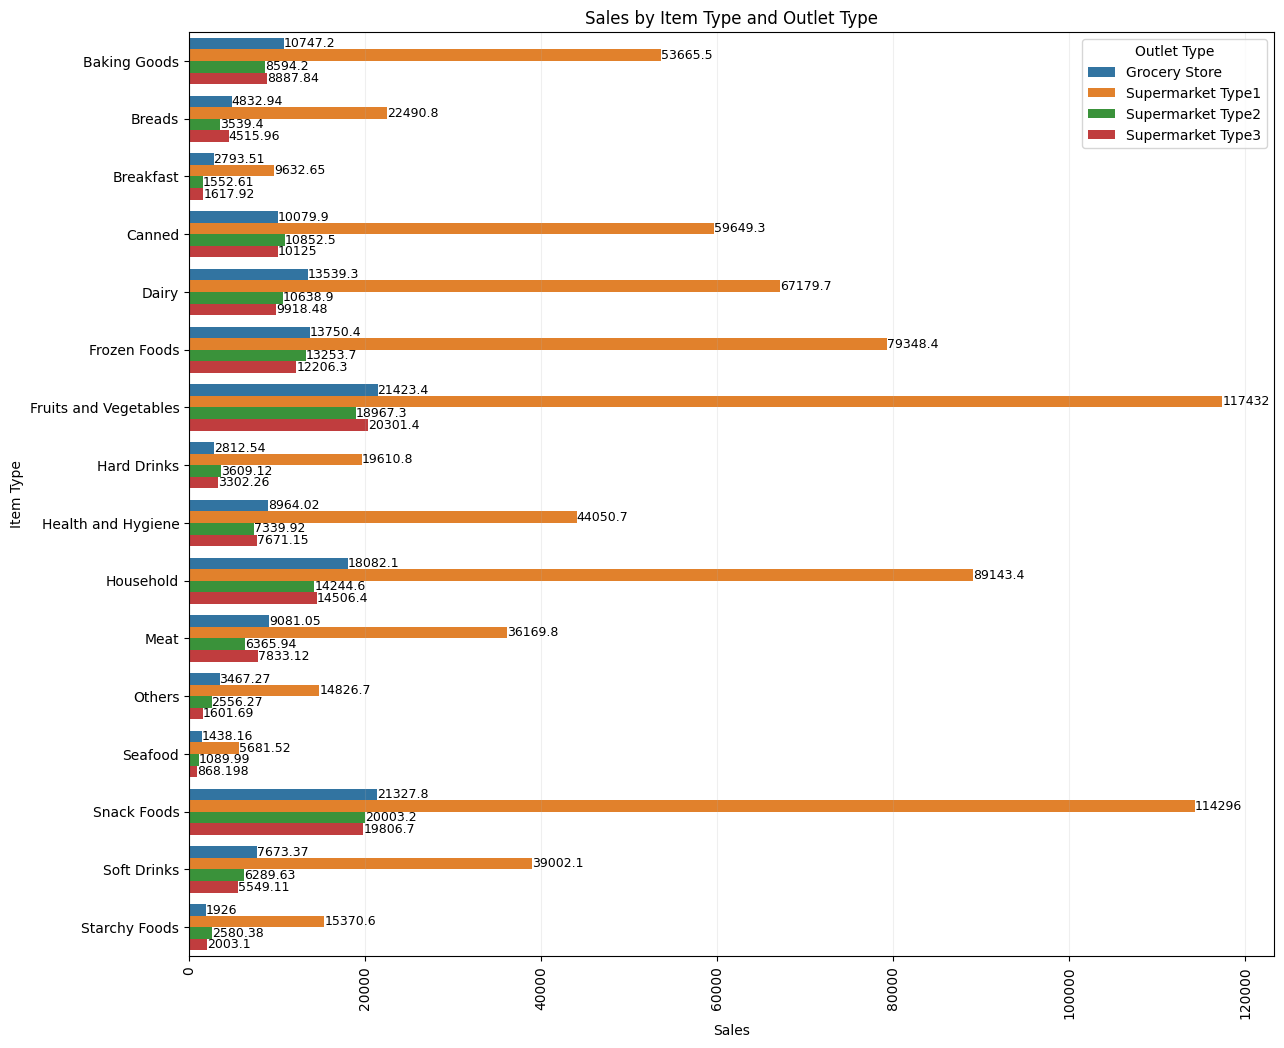

In [173]:
plt.figure(figsize=(14,12))
sales_by_item_outlet=df.groupby(['Item Type','Outlet Type'])['Sales'].sum().reset_index()

ax=sns.barplot(x='Sales',y='Item Type',data=sales_by_item_outlet,hue='Outlet Type')

for bars in ax.containers:
  ax.bar_label(bars,fontsize=9)
plt.title('Sales by Item Type and Outlet Type')
plt.xticks(rotation=90)
plt.grid(axis='x',alpha=0.2)

plt.show()

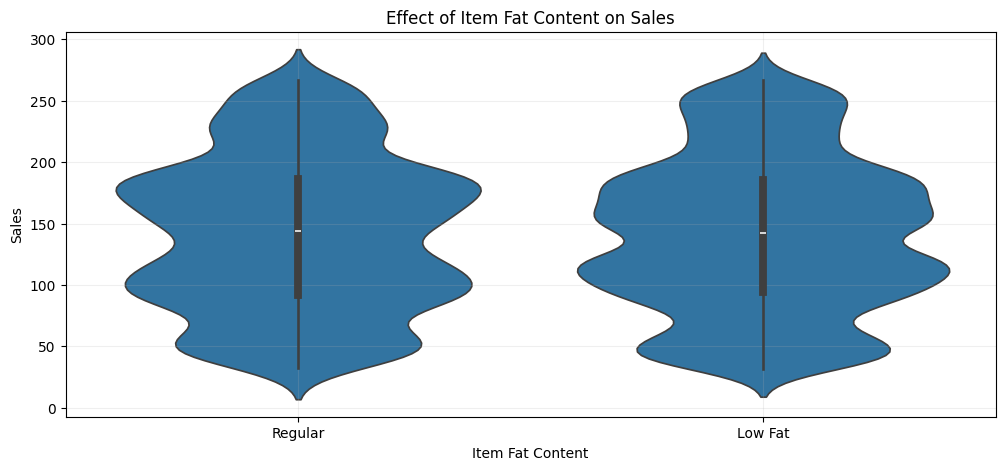

In [177]:
plt.figure(figsize=(12,5))
sns.violinplot(x='Item Fat Content', y='Sales', data=df)

plt.title('Effect of Item Fat Content on Sales')
plt.xlabel('Item Fat Content')
plt.ylabel('Sales')
plt.grid(True,alpha=0.2)
plt.show()

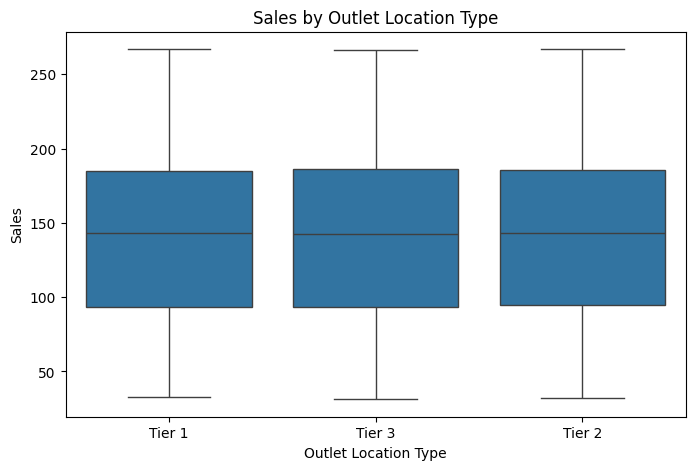

In [178]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Outlet Location Type', y='Sales', data=df)

plt.title('Sales by Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Sales')
plt.show()

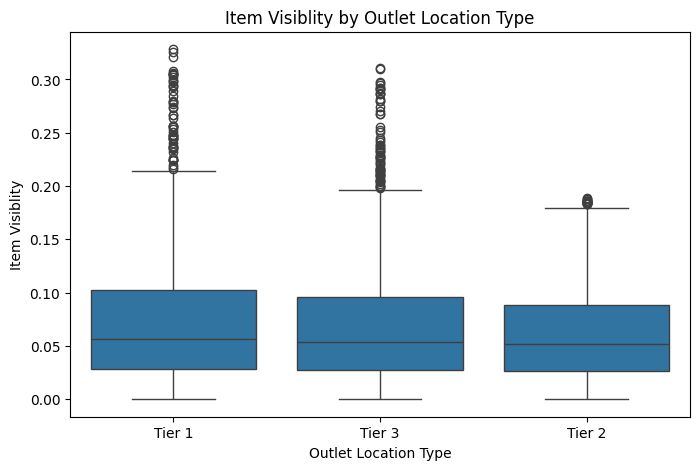

In [180]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Outlet Location Type', y='Item Visibility', data=df)

plt.title('Item Visiblity by Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Item Visiblity')
plt.show()

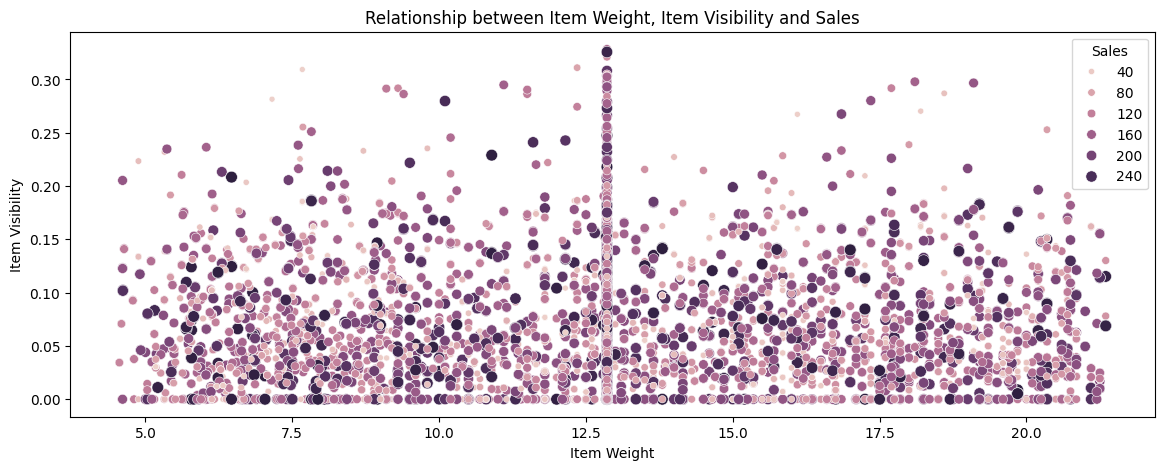

In [186]:
plt.figure(figsize=(14,5))
sns.scatterplot(
    x='Item Weight',
    y='Item Visibility',
    size='Sales',
    data=df,
    hue='Sales'
)

plt.title('Relationship between Item Weight, Item Visibility and Sales')
plt.xlabel('Item Weight')
plt.ylabel('Item Visibility')
plt.show()

# Conclusion:
Item Fat Content vs Sales
The sales distribution for Low Fat and Regular items is very similar. Both categories have nearly the same median sales, indicating that item fat content does not have a significant impact on sales.

Outlet Location Type vs Sales
Sales across Tier 1, Tier 2, and Tier 3 outlets show similar medians and spreads. This suggests that outlet location type does not strongly influence sales performance.

Outlet Location Type vs Item Visibility
Item visibility remains consistent across all outlet location types. Although a few highly visible items appear as outliers in Tier 1 and Tier 3 outlets, overall visibility is not significantly affected by outlet location.

Item Weight and Item Visibility vs Sales
Scatter plot analysis shows no strong linear relationship between item weight, item visibility, and sales. Sales are evenly distributed across different weights and visibility levels.

Overall Sales Pattern
Sales values vary widely across products, indicating the presence of both low- and high-performing items. However, no single feature dominates sales behavior.